# **Introduzione al Machine Learning -- laboratorio 13 e 14**

* Regressione lineare multipla



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


from matplotlib import pyplot as plt
X['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['Diameter'].plot(kind='hist', bins=20, title='Diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['Whole_weight'].plot(kind='hist', bins=20, title='Whole_weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Length', y='Diameter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Diameter', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Height', y='Whole_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Whole_weight', y='Shucked_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['Length'].plot(kind='line', figsize=(8, 4), title='Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['Diameter'].plot(kind='line', figsize=(8, 4), title='Diameter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['Whole_weight'].plot(kind='line', figsize=(8, 4), title='Whole_weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Length', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Diameter', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Height', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Whole_weight', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-10-954774488379>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Length', y='Sex', inner='box', palette='Dark2')


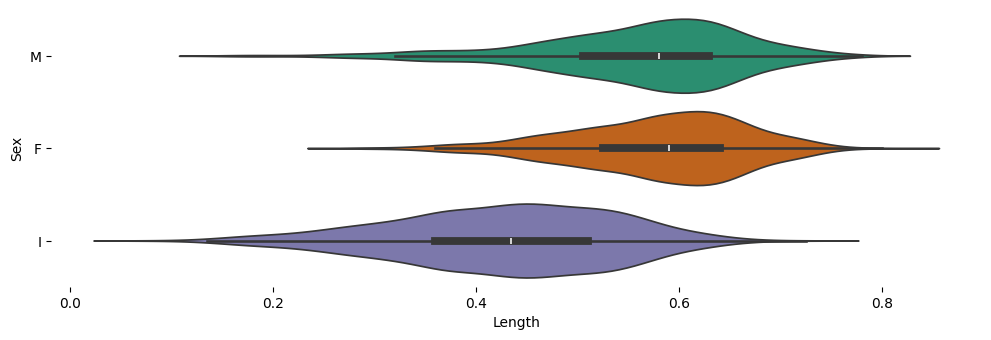

In [ ]:
# @title Sex vs Length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Length', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

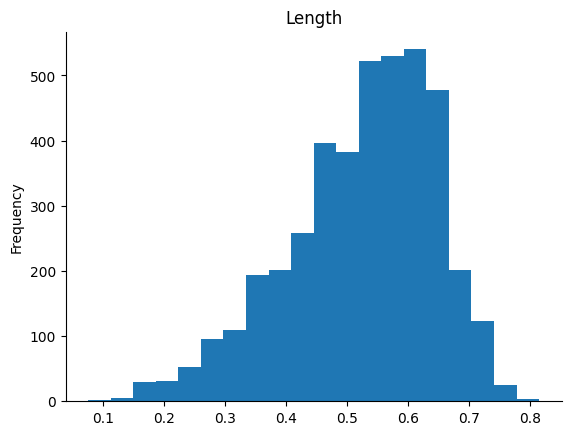

In [ ]:
# @title Length

from matplotlib import pyplot as plt
X['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

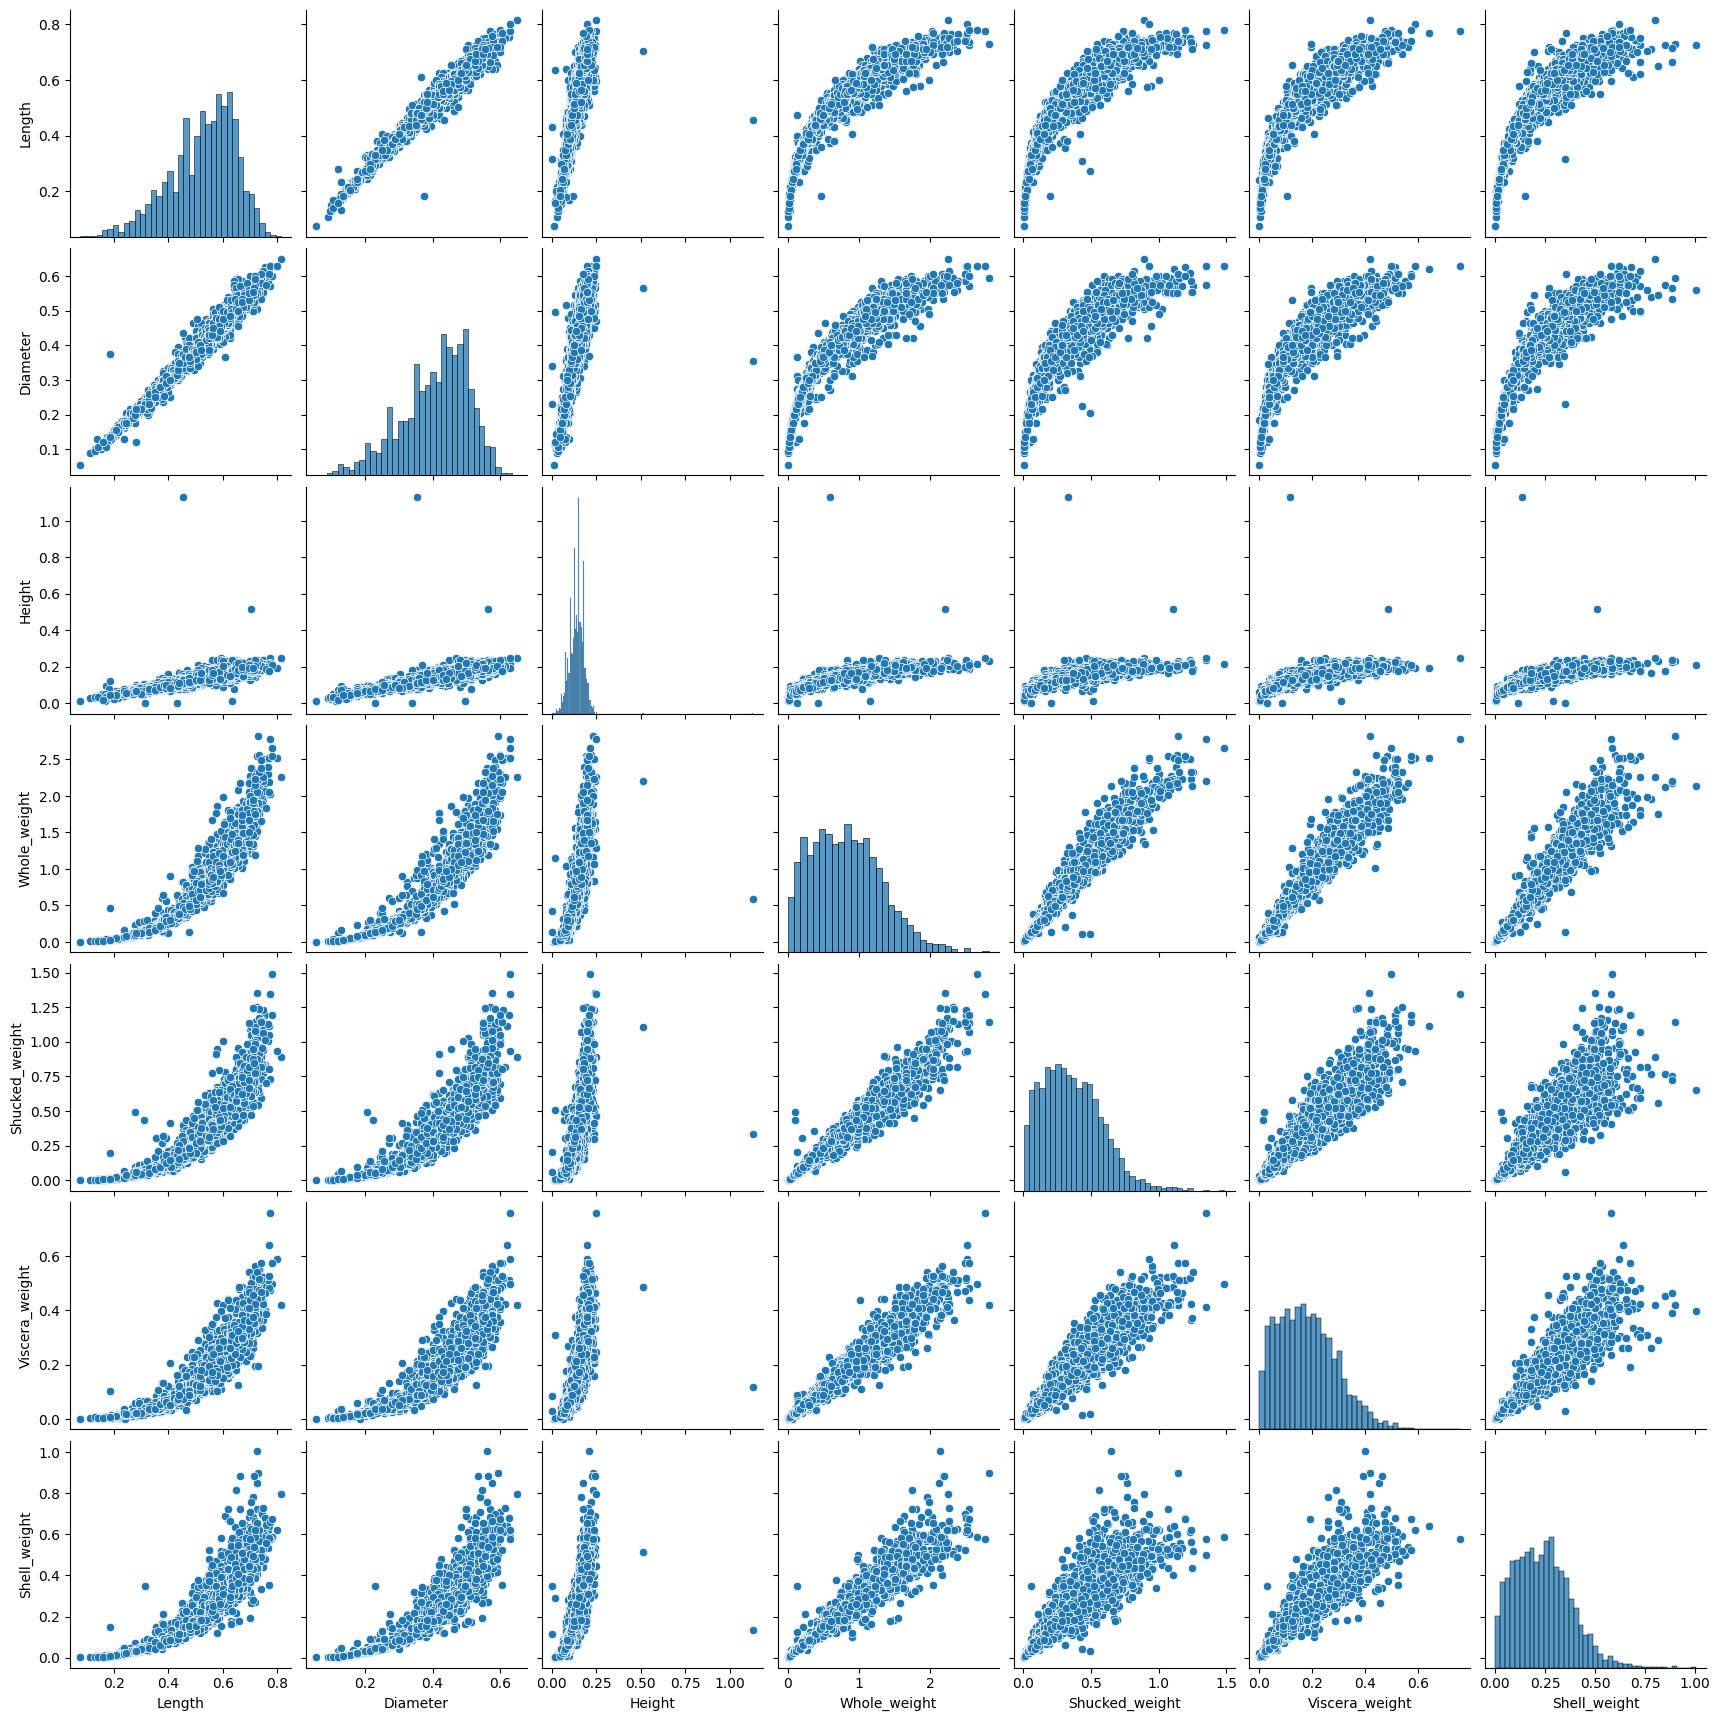

In [ ]:
sns.pairplot(X)

Osservo la presenza di alcuni (almeno due) outliers, che dovrò rimuovere.

In [ ]:
# y e X hanno gli stessi indici, quindi posso unirli senza problemi

Z = X.copy()
Z['Rings'] = y['Rings']

In [ ]:
Z

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


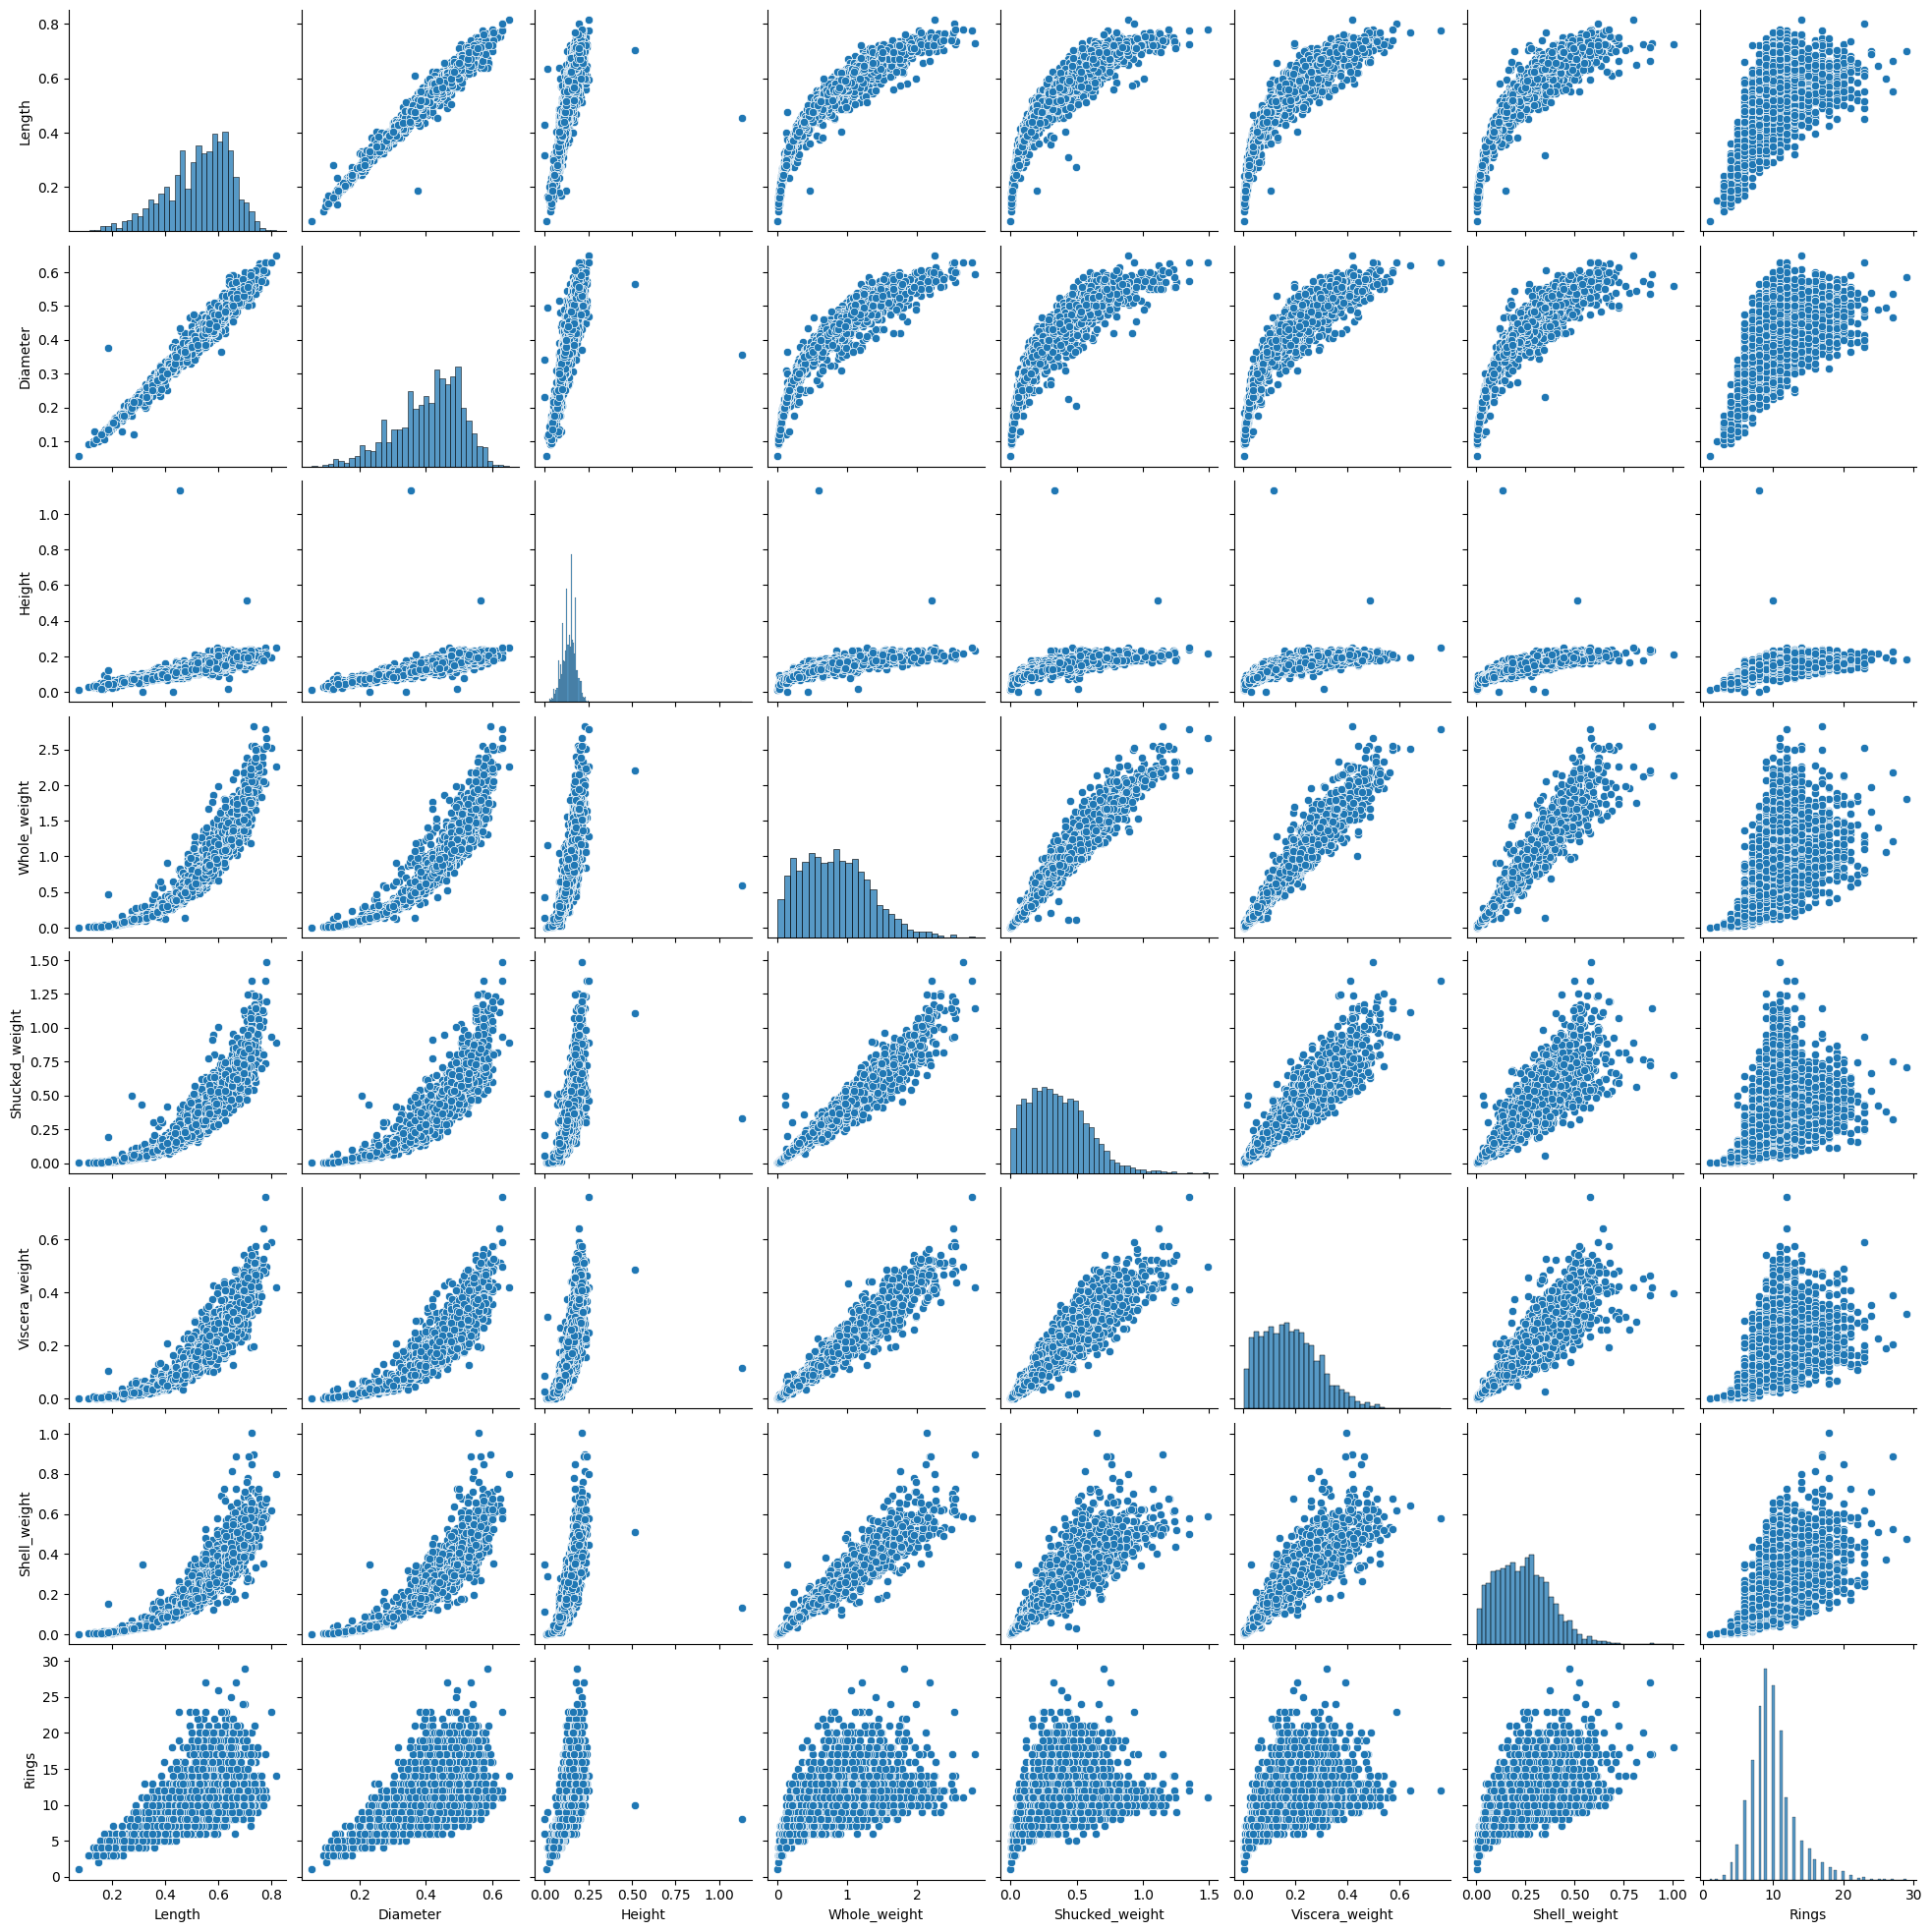

In [ ]:
sns.pairplot(Z)

In [ ]:
outliers = X.nlargest(2, 'Height')
outliers

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120


In [115]:
X1 = X.drop(outliers.index)
X1.shape

(4175, 8)

In [ ]:
y1 = y.drop(outliers.index)
y1.shape

(4175, 1)

In [116]:
# Droppo la variabile categorica (andrebbe trasformata)

X1 = X1.drop(columns='Sex')
X1.shape

(4175, 7)

Siamo pronti per lanciare la regressione

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X1, y1)

LinearRegression()

In [ ]:
print(model.coef_)             # B1, ..., B7
print(model.intercept_)        # B0
print(model.rank_)             # <=p
print(model.singular_)         # ????
print(model.n_features_in_)    # p
print(model.feature_names_in_) # nomi variabili


[[ -2.27570331  11.30120332  25.14883981   9.10463093 -19.7651756
  -10.44001666   7.456762  ]]
[2.67765677]
7
[37.54277278  4.06374274  3.48273279  2.09879251  1.34946308  0.95615878
  0.78107532]
7
['Length' 'Diameter' 'Height' 'Whole_weight' 'Shucked_weight'
 'Viscera_weight' 'Shell_weight']


In [ ]:
model.score(X1, y1) # R²_D

0.5344819918586929

Mancano un sacco di output, quindi proviamo a farli a mano.

In [ ]:
model.predict(X1)

array([[ 8.46286175],
       [ 7.2414669 ],
       [10.79585804],
       ...,
       [11.45144262],
       [ 9.46081929],
       [11.05092977]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Equivalente a predict
np.matmul(X1, model.coef_.T) + model.intercept_

,0
0,8.462862
1,7.241467
2,10.795858
3,9.349122
4,6.915596
...,...
4172,10.751247
4173,9.523879
4174,11.451443
4175,9.460819


In [ ]:
residuals = y1 - model.predict(X1)

In [ ]:
SSR = np.square(residuals.to_numpy()).sum() # SSR
SSR

20206.687216263043

In [ ]:
n, p = X1.shape
Se = np.sqrt(SSR / (n-p-1))
Se

2.202093775147545

In [ ]:
# Passo alla notazione matriciale standard

X2 = X1.copy()
X2.insert(0, 'dummy', 1)
X2

,dummy,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [74]:
cov = np.linalg.inv(X2.T @ X2)
cov

array([[ 0.01505441, -0.0379265 ,  0.00260488, -0.02692415,  0.0021779 ,
         0.00426912,  0.00994222,  0.01092892],
       [-0.0379265 ,  0.67889159, -0.73904235, -0.04708775,  0.00410555,
        -0.02582048, -0.04242941,  0.0155842 ],
       [ 0.00260488, -0.73904235,  1.03163558, -0.17347662, -0.00727422,
         0.00344112,  0.02544752, -0.04937002],
       [-0.02692415, -0.04708775, -0.17347662,  1.08061968, -0.01108183,
         0.02927314, -0.0473153 , -0.08732459],
       [ 0.0021779 ,  0.00410555, -0.00727422, -0.01108183,  0.10919711,
        -0.10191634, -0.11995731, -0.13409907],
       [ 0.00426912, -0.02582048,  0.00344112,  0.02927314, -0.10191634,
         0.13855937,  0.05794793,  0.11719393],
       [ 0.00994222, -0.04242941,  0.02544752, -0.0473153 , -0.11995731,
         0.05794793,  0.34698546,  0.10226114],
       [ 0.01092892,  0.0155842 , -0.04937002, -0.08732459, -0.13409907,
         0.11719393,  0.10226114,  0.26690946]])

In [82]:
model.coef_

array([[ -2.27570331,  11.30120332,  25.14883981,   9.10463093,
        -19.7651756 , -10.44001666,   7.456762  ]])

In [81]:
B = cov @ X2.T @ y1
B

,Rings
0,2.677657
1,-2.275703
2,11.301203
3,25.148840
4,9.104631
5,-19.765176
6,-10.440017
7,7.456762


In [91]:
B

,Rings
0,2.677657
1,-2.275703
2,11.301203
3,25.148840
4,9.104631
5,-19.765176
6,-10.440017
7,7.456762


In [95]:
T = B.T / (np.sqrt(np.diag(cov)) * Se)
T.columns = X2.columns
T

,dummy,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Rings,9.910311,-1.254237,5.052726,10.986155,12.511834,-24.11276,-8.048403,6.554393


In [96]:
from scipy.stats import t

In [108]:
p_val = 2 * t.sf(np.abs(T), df=n-p-1)
[f'{pv:.4g}' for pv in p_val.reshape(-1)]

['6.715e-23',
 '0.2098',
 '4.542e-07',
 '1.065e-27',
 '2.75e-35',
 '2.283e-120',
 '1.084e-15',
 '6.268e-11']

Tutte le variabili notevolmente impattanti (tranne una), probsabilmente a causa dell'altissimo rapporto n/p.

HW: Calcolare R²_A (viene quasi uguale a R²_D)

Vanno però controllati i grafici dei residui: sono tanti, uno per variabile di ingresso più due.

*   Per ogni variabile x_j, si fa lo scatter plot (x_j vs residual)
*   Ultimo scatter plot (Y_predicted vs residual)
*   Distribuzione dei residui


In [120]:
Z = X1.copy()
Z.insert(0, 'Residuals', residuals)
Z.insert(1, 'Predicted', model.predict(X1))
Z

,Residuals,Predicted,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,6.537138,8.462862,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,-0.241467,7.241467,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,-1.795858,10.795858,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.650878,9.349122,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.084404,6.915596,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,0.248753,10.751247,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.476121,9.523879,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,-2.451443,11.451443,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.539181,9.460819,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [132]:
Z['Sex'] = X.drop(outliers.index)['Sex']
Z

,Residuals,Predicted,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex
0,6.537138,8.462862,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,M
1,-0.241467,7.241467,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,M
2,-1.795858,10.795858,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,F
3,0.650878,9.349122,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,M
4,0.084404,6.915596,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,I
...,...,...,...,...,...,...,...,...,...,...
4172,0.248753,10.751247,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,F
4173,0.476121,9.523879,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,M
4174,-2.451443,11.451443,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,M
4175,0.539181,9.460819,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,F


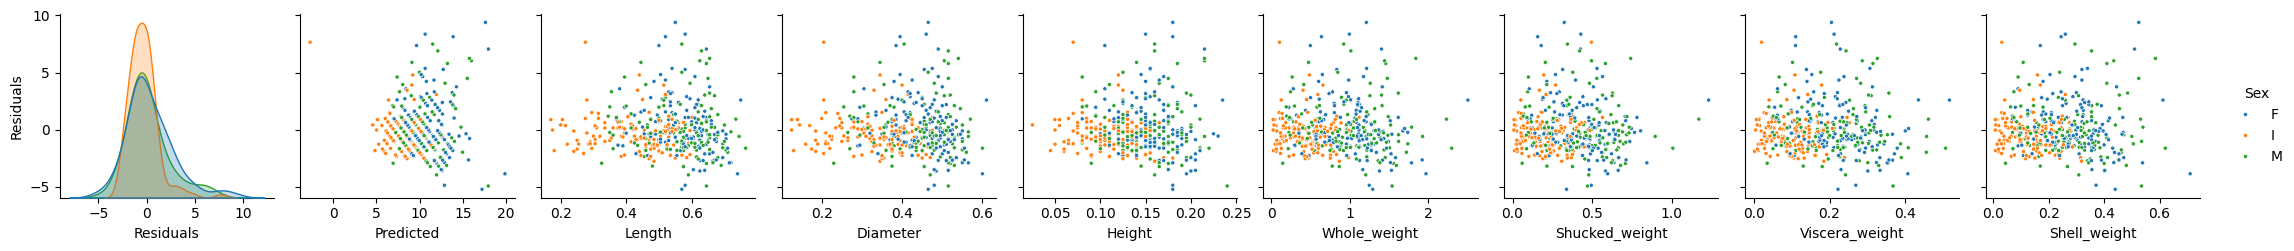

In [133]:
sns.pairplot(Z.sample(n=400), markers='.', y_vars='Residuals', hue='Sex')

HW: Rifare tutto provando a trasformare fin dall'inizio la variabile Rings in modo da ridurne la coda destra. (sqrt o log.)